[View in Colaboratory](https://colab.research.google.com/github/udithv/DeepLearning/blob/master/tensorflow_classification.ipynb)

In [0]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# Getting  the data
#Pima Indian dataset

#!wget https://gist.githubusercontent.com/ktisha/c21e73a1bd1700294ef790c56c8aec1f/raw/819b69b5736821ccee93d05b51de0510bea00294/pima-indians-diabetes.csv

from google.colab import files
files.upload()

#Upload the pima-indians-diabetes.csv file

Saving pima-indians-diabetes.csv to pima-indians-diabetes.csv


{'pima-indians-diabetes.csv': b'Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group\n6,0.7437185929648241,0.5901639344262295,0.35353535353535354,0.0,0.5007451564828614,0.23441502988898377,50,1,B\n1,0.4271356783919598,0.5409836065573771,0.29292929292929293,0.0,0.3964232488822653,0.1165670367207515,31,0,C\n8,0.9195979899497487,0.5245901639344263,0.0,0.0,0.34724292101341286,0.2536293766011956,32,1,B\n1,0.4472361809045226,0.5409836065573771,0.23232323232323232,0.1111111111111111,0.41877794336810736,0.03800170794192997,21,0,B\n0,0.6884422110552764,0.32786885245901637,0.35353535353535354,0.19858156028368795,0.6423248882265277,0.9436379163108456,33,1,C\n5,0.5829145728643216,0.6065573770491803,0.0,0.0,0.3815201192250373,0.052519214346712216,30,0,A\n3,0.39195979899497485,0.4098360655737705,0.32323232323232326,0.10401891252955082,0.4619970193740686,0.07258753202391117,26,1,C\n10,0.5778894472361809,0.0,0.0,0.0,0.526080476900149,0.023911187019641334,29

In [8]:
!ls

pima-indians-diabetes.csv  sample_data	wget-log


In [9]:
diabetes = pd.read_csv('pima-indians-diabetes.csv')

diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [10]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [0]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [0]:
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: (x - x.min())/ (x.max() - x.min() ))

In [13]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [14]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [0]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

In [0]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group', ['A', 'B', 'C', 'D'])

In [0]:
#assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group', hash_bucket_size=10)

In [0]:
#Feature Engineering
%matplotlib inline

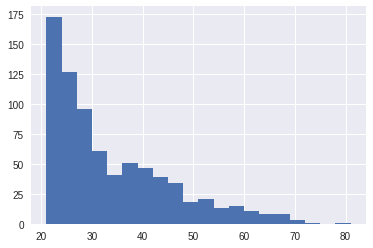

In [18]:
diabetes['Age'].hist(bins=20)

In [0]:
age_buckets = tf.feature_column.bucketized_column(age, boundaries=[20, 30, 40, 50, 60, 70, 80])

In [0]:
feat_cols = [num_preg ,plasma_gluc,dias_press ,tricep ,insulin,bmi,diabetes_pedigree ,assigned_group, age_buckets]

In [0]:
# TRAIN TEST SPLIT

x_data = diabetes.drop('Class', axis=1)
x_data

In [0]:
labels = diabetes['Class']
labels

In [0]:
from sklearn.model_selection import train_test_split


In [0]:
X_train, X_test, y_train, y_test = train_test_split(x_data, labels, test_size=0.3, random_state=101)

In [0]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train, y=y_train, batch_size=10, num_epochs=1000, shuffle=True)

In [28]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmppv0w43_l', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f1b8d606278>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [29]:
model.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmppv0w43_l/model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 0
INFO:tensorflow:global_step/sec: 81.2658
INFO:tensorflow:loss = 4.7977166, step = 100 (1.233 sec)
INFO:tensorflow:global_step/sec: 91.2171
INFO:tensorflow:loss = 6.2700067, step = 200 (1.096 sec)
INFO:tensorflow:global_step/sec: 92.2923
INFO:tensorflow:loss = 4.651779, step = 300 (1.087 sec)
INFO:tensorflow:global_step/sec: 91.6224
INFO:tensorflow:loss = 7.8466415, step = 400 (1.087 sec)
INFO:tensorflow:global_step/sec: 96.1212
INFO:tensorflow:loss = 5.383491, step = 500 (1.042 sec)
INFO:tensorflow:global_step/sec: 92.7471
INFO:tensorflow:loss = 6.566575, step = 600 (1.079 sec)
INFO:tensorflow:global_step/sec: 93.6063
INFO:tensorflow:loss

In [0]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test, y=y_test, batch_size=10, num_epochs=1, shuffle=False)

In [31]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-09-20-09:29:18
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmppv0w43_l/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-09-20-09:29:19
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.74891776, accuracy_baseline = 0.64935064, auc = 0.79769546, auc_precision_recall = 0.6374652, average_loss = 0.53029805, global_step = 1000, label/mean = 0.35064936, loss = 5.104119, precision = 0.6619718, prediction/mean = 0.3780943, recall = 0.5802469
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /tmp/tmppv0w43_l/model.ckpt-1000


In [32]:
results

{'accuracy': 0.74891776,
 'accuracy_baseline': 0.64935064,
 'auc': 0.79769546,
 'auc_precision_recall': 0.6374652,
 'average_loss': 0.53029805,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 5.104119,
 'precision': 0.6619718,
 'prediction/mean': 0.3780943,
 'recall': 0.5802469}

In [0]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test, batch_size=10, num_epochs=1, shuffle=False)

In [0]:
predictions = model.predict(pred_input_func)


In [35]:
my_pred = list(predictions)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmppv0w43_l/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [36]:
my_pred

[{'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logistic': array([0.56768686], dtype=float32),
  'logits': array([0.27241975], dtype=float32),
  'probabilities': array([0.43231314, 0.56768686], dtype=float32)},
 {'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logistic': array([0.62583166], dtype=float32),
  'logits': array([0.5143755], dtype=float32),
  'probabilities': array([0.37416834, 0.62583166], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.3931893], dtype=float32),
  'logits': array([-0.43392575], dtype=float32),
  'probabilities': array([0.6068107 , 0.39318928], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.36148065], dtype=float32),
  'logits': array([-0.56894356], dtype=float32),
  'probabilities': array([0.63851935, 0.36148062], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=

In [37]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10, 10, 10], feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpg6yd31y9', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f1b88ff0908>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [0]:
embedded_group_col = tf.feature_column.embedding_column(assigned_group, dimension=4)

In [0]:
feat_cols = [num_preg ,plasma_gluc,dias_press ,tricep ,insulin,bmi,diabetes_pedigree, embedded_group_col, age_buckets]

In [0]:
input_func = tf.estimator.inputs.pandas_input_fn(X_train, y_train, batch_size=10, num_epochs=1000, shuffle=True)

In [45]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10, 20, 20, 20, 10], feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpx7kw194d', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f1b8924d1d0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [46]:
dnn_model.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpx7kw194d/model.ckpt.
INFO:tensorflow:loss = 6.920563, step = 0
INFO:tensorflow:global_step/sec: 88.2974
INFO:tensorflow:loss = 7.2051344, step = 100 (1.136 sec)
INFO:tensorflow:global_step/sec: 114.33
INFO:tensorflow:loss = 5.8966503, step = 200 (0.874 sec)
INFO:tensorflow:global_step/sec: 109.501
INFO:tensorflow:loss = 6.607467, step = 300 (0.914 sec)
INFO:tensorflow:global_step/sec: 112.208
INFO:tensorflow:loss = 6.3189077, step = 400 (0.888 sec)
INFO:tensorflow:global_step/sec: 109.963
INFO:tensorflow:loss = 4.920293, step = 500 (0.913 sec)
INFO:tensorflow:global_step/sec: 113.617
INFO:tensorflow:loss = 3.1886857, step = 600 (0.880 sec)
INFO:tensorflow:global_step/sec: 112.474
INFO:tensorflow:loss

In [0]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test, y=y_test, batch_size=10, num_epochs=1, shuffle=False)

In [48]:
dnn_model.evaluate(input_fn=eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-09-20-09:42:22
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpx7kw194d/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-09-20-09:42:23
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.7619048, accuracy_baseline = 0.64935064, auc = 0.8428394, auc_precision_recall = 0.73065037, average_loss = 0.46745217, global_step = 1000, label/mean = 0.35064936, loss = 4.499227, precision = 0.6666667, prediction/mean = 0.33270878, recall = 0.6419753
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /tmp/tmpx7kw194d/model.ckpt-1000


{'accuracy': 0.7619048,
 'accuracy_baseline': 0.64935064,
 'auc': 0.8428394,
 'auc_precision_recall': 0.73065037,
 'average_loss': 0.46745217,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 4.499227,
 'precision': 0.6666667,
 'prediction/mean': 0.33270878,
 'recall': 0.6419753}